# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [56]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [60]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [64]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [66]:
# Extract all rows of data
# Create an empty list
table = soup.find('table')
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    if len(cells) == 7:  # Ensure the row has the correct number of columns
        id_ = cells[0].get_text(strip=True)
        terrestrial_date = cells[1].get_text(strip=True)
        sol = cells[2].get_text(strip=True)
        ls = cells[3].get_text(strip=True)
        month = cells[4].get_text(strip=True)
        min_temp = cells[5].get_text(strip=True).replace('°', '')  # Clean up ° symbol
        pressure = cells[6].get_text(strip=True)
        
        # Add row to the list
        rows.append([id_, terrestrial_date, sol, ls, month, min_temp, pressure])

In [67]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(rows, columns=column_names)

In [68]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [74]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [76]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(str)  # Change id to object (string type)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])  # Change terrestrial_date to datetime64[ns]
mars_df['sol'] = mars_df['sol'].astype(int)  # Change sol to integer
mars_df['ls'] = mars_df['ls'].astype(int)  # Change ls to integer
mars_df['month'] = mars_df['month'].astype(int)  # Change month to integer
mars_df['min_temp'] = mars_df['min_temp'].astype(float)  # Change min_temp to float (temperature in Celsius)
mars_df['pressure'] = mars_df['pressure'].astype(float)  # Change pressure to float (atmospheric pressure)

In [78]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [81]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [83]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_df['sol'].nunique()
print(f"There are {total_sols} sols worth of data.")

There are 1867 sols worth of data.


In [85]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print("Average minimum temperature by month:")
print(avg_min_temp_by_month)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


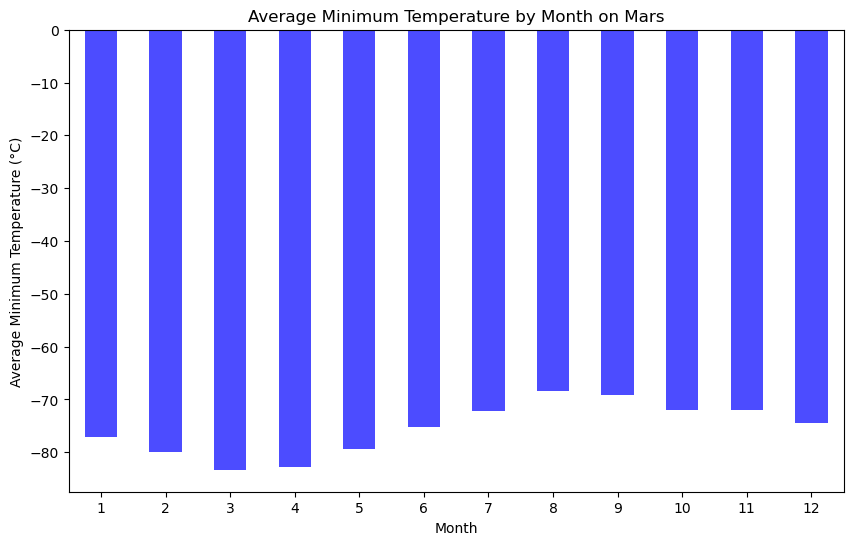

In [87]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Average Minimum Temperature by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.xticks(rotation=0)
plt.show()

The coldest month is 3 with an average minimum temperature of -83.31°C.
The hottest month is 8 with an average minimum temperature of -68.38°C.


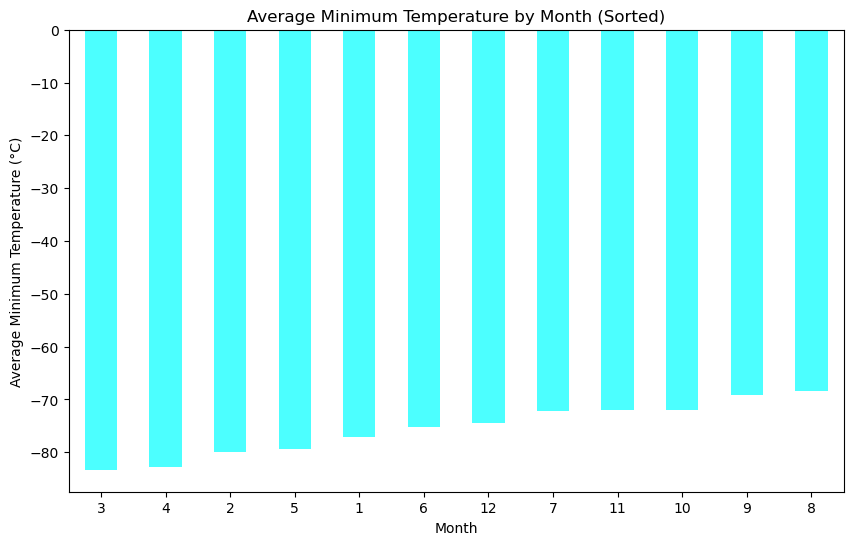

In [89]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp = avg_min_temp_by_month.sort_values()
coldest_month = sorted_temp.idxmin()
hottest_month = sorted_temp.idxmax()
print(f"The coldest month is {coldest_month} with an average minimum temperature of {sorted_temp.min():.2f}°C.")
print(f"The hottest month is {hottest_month} with an average minimum temperature of {sorted_temp.max():.2f}°C.")

# Plot coldest and hottest months sorted
plt.figure(figsize=(10, 6))
sorted_temp.plot(kind='bar', color='cyan', alpha=0.7)
plt.title("Average Minimum Temperature by Month (Sorted)")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.xticks(rotation=0)
plt.show()

In [91]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print("Average pressure by month:")
print(avg_pressure_by_month)

Average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


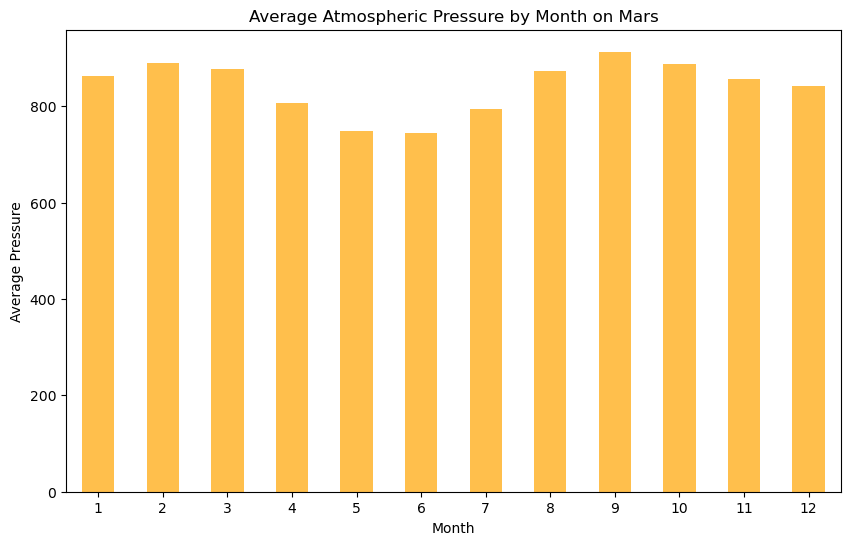

In [92]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Average Atmospheric Pressure by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.xticks(rotation=0)
plt.show()

The lowest pressure month is 6 with an average pressure of 745.05.
The highest pressure month is 9 with an average pressure of 913.31.


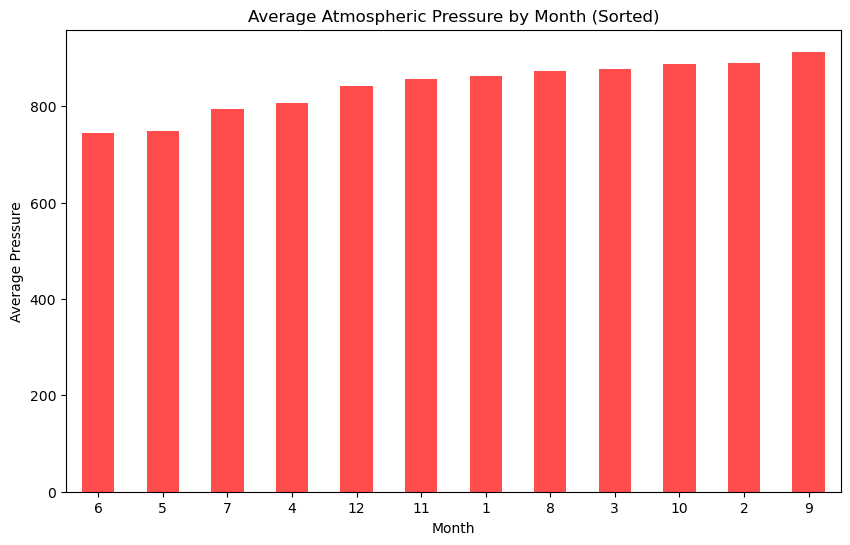

In [95]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = avg_pressure_by_month.sort_values()
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()
print(f"The lowest pressure month is {lowest_pressure_month} with an average pressure of {sorted_pressure.min():.2f}.")
print(f"The highest pressure month is {highest_pressure_month} with an average pressure of {sorted_pressure.max():.2f}.")

# Plot lowest and highest pressure months sorted
plt.figure(figsize=(10, 6))
sorted_pressure.plot(kind='bar', color='red', alpha=0.7)
plt.title("Average Atmospheric Pressure by Month (Sorted)")
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.xticks(rotation=0)
plt.show()

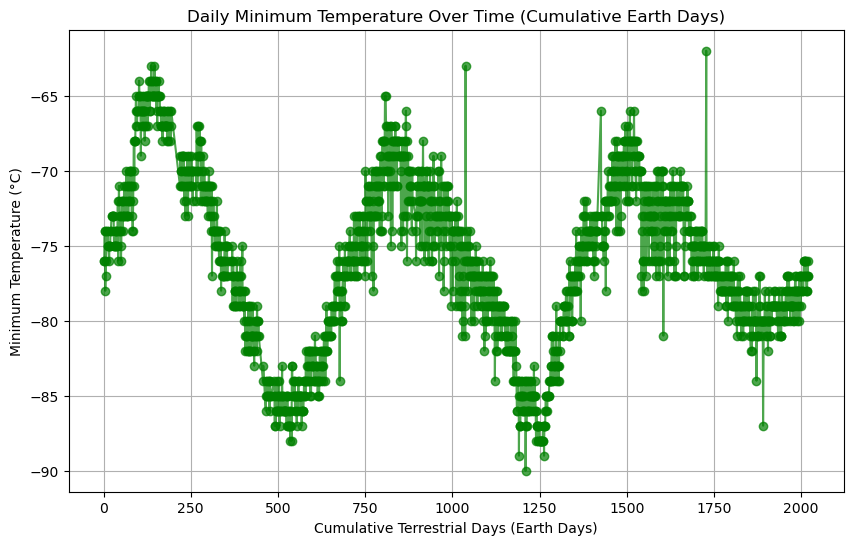

0          NaN
1          1.0
2          2.0
3          3.0
4          4.0
         ...  
1862    2017.0
1863    2018.0
1864    2019.0
1865    2020.0
1866    2021.0
Name: terrestrial_day_diff, Length: 1867, dtype: float64


In [97]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Calculate the difference in Earth days between consecutive terrestrial dates
mars_df['terrestrial_day_diff'] = mars_df['terrestrial_date'].diff().dt.days

# Calculate cumulative Earth days for each observation
cumulative_days = mars_df['terrestrial_day_diff'].cumsum()

# Plot the daily minimum temperature over cumulative Earth days
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set
plt.figure(figsize=(10, 6))
plt.plot(cumulative_days, mars_df['min_temp'], marker='o', linestyle='-', alpha=0.7, color='green')
plt.title("Daily Minimum Temperature Over Time (Cumulative Earth Days)")
plt.xlabel("Cumulative Terrestrial Days (Earth Days)")
plt.ylabel("Minimum Temperature (°C)")
plt.grid(True)
plt.show()

# Print the cumulative Earth days
print(cumulative_days)

#### Minimum Temperature

The average minimum temperature on Mars varies significantly across the Martian months. From the analysis, month 3 is the coldest month, with the lowest average minimum temperature, while month 8 is the warmest. This variation likely reflects the influence of seasonal changes on the Martian surface temperature. The temperature data graph reveals a clear trend, with temperatures rising during certain months and falling during others, indicative of the planet's seasonal cycle
dtype: float64

#### Atmospheric Pressure

Atmospheric pressure on Mars also shows notable variations across the months. The analysis identified month 6 as having the lowest average atmospheric pressure and month 9 as having the highest. These fluctuations likely relate to Mars' thin atmosphere and its response to seasonal changes, such as sublimation of polar ice caps during warmer months, which increases atmospheric pressure.

#### Year Length

The estimated length of a Martian year is approximately 687 terrestrial days, which corresponds to the time it takes for Mars to complete one full orbit around the Sun. This estimate is based on the dataset, where we look at how the solar longitude (ls) changes from 0° to 360° and calculate the terrestrial days that elapse during this period.

In the dataset, the 1867 terrestrial days represent the total length of the observational period, which spans multiple Martian years. This is the number of Earth days covered by the dataset, not just a single Martian year.

When focusing on a single Martian year, we find that 687 Earth days elapse, which is the length of Mars's orbit around the Sun.

The plot of daily minimum temperature over cumulative terrestrial days confirms this cyclical pattern, showing that each cycle corresponds roughly to the length of a Martian year. Thus, the 687 days corresponds to the length of one full Martian year, while the 1867 days represents the total Earth days covered by all the observations in your dataset.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [103]:
# Write the data to a CSV
output_path = "mars_weather_data.csv"
mars_df.to_csv(output_path, index=False)
print(f"Data written to {output_path}")

Data written to mars_weather_data.csv


In [104]:
browser.quit()